# TD(0) with gradient correction (TDC or GTD(0)) on Baird’s counterexample

Figure 11.5 shows a sample and the expected behavior of TDC on Baird’s counterexample.
- As intended, the $\overline{PBE}$ falls to 0, but note that the individual components of the parameter vector do not approach 0.
- In fact, these values are still far from an optimal solution, $\hat{v}(s)=0,\forall s$, for which $\mathbf{w}$ would have to be proportional to $(1, 1,1,1,1,1,4, 2)^T$.
- After 1000 iterations we are still far from an optimal solution, as we can see from the $\overline{VE}$, which remains almost 2.
- The system is actually converging to an optimal solution, but progress is extremely slow because the $\overline{PBE}$ is already so close to 0.

In [1]:
from IPython.display import Image

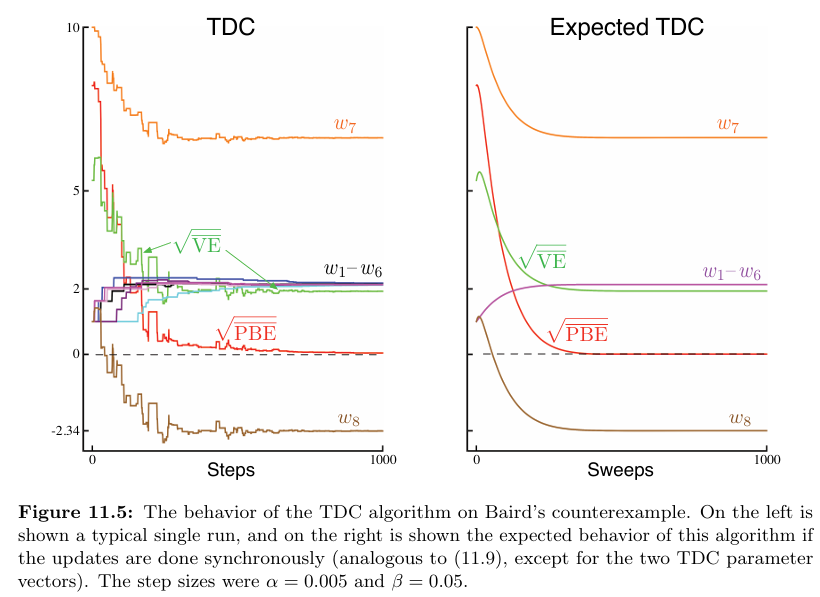

In [2]:
Image(filename="../book_images/Figure_11_5.PNG")

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [ ]:
from src.counter_example import feature_vector_size, states, TDC, expected_TDC, compute_RMSVE, compute_RMSPBE

## Figure 11.6 (left): Temporal-Difference with Gradient Correction (TDC)

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)

In [ ]:
# Initialize the weights vector (denoted as for 𝒘)
weights = np.ones(feature_vector_size)
weights[6] = 10

# Initialize the linear least-squares (LLS) solution vector (denoted as 𝒗)
LLS_solution = np.zeros(feature_vector_size)

In [ ]:
# Step-size parameter for 𝒘 (denoted as 𝛼)
step_size_w = 0.005

# Step-size parameter for 𝒗 (denoted as 𝛽)
step_size_v = 0.05

In [ ]:
# Number of steps
steps = 1000

# Create a weights matrix of size feature vector size * number of steps filled with 0s
weights_matrix = np.zeros((feature_vector_size, steps))

In [ ]:
# Initialize RMS-VE
RMS_VE = np.zeros(steps)

# Initialize RMS-PBE
RMS_PBE = np.zeros(steps)

# Choose a random state
state = np.random.choice(states)

In [ ]:
# For every step
for step in tqdm(range(steps)):
    # get the next state using TDC algorithm
    state = TDC(state, weights, LLS_solution, step_size_w, step_size_v)
    
    # record weights vector into weights matrix
    weights_matrix[:, step] = weights
    
    # calculate RMS-VE
    RMS_VE[step] = compute_RMSVE(weights)
    
    # calculate RMS-PBE
    RMS_PBE[step] = compute_RMSPBE(weights)

In [ ]:
# Plotting
for i in range(feature_vector_size):
    plt.plot(weights_matrix[i, :], label=fr"$w_{i + 1}$")

In [ ]:
plt.plot(RMS_VE, label=r"$\sqrt{\overline{VE}}$")
plt.plot(RMS_PBE, label=r"$\sqrt{\overline{PBE}}$")
plt.xlabel("Steps")
plt.title("TDC")
plt.legend()

## Figure 11.6 (right): Expected Temporal-Difference with Gradient Correction (Expected TDC)

In [ ]:
plt.subplot(2, 1, 2)

In [ ]:
# Initialize the weights vector (denoted as for 𝒘)
weights = np.ones(feature_vector_size)
weights[6] = 10

# Initialize the linear least-squares (LLS) solution vector (denoted as 𝒗)
LLS_solution = np.zeros(feature_vector_size)

In [ ]:
# Step-size parameter for 𝒘 (denoted as 𝛼)
step_size_w = 0.005

# Step-size parameter for 𝒗 (denoted as 𝛽)
step_size_v = 0.05

In [ ]:
# Number of sweeps
sweeps = 1000

# Create a weights matrix of size feature vector size * number of sweeps filled with 0s
weights_matrix = np.zeros((feature_vector_size, sweeps))

In [ ]:
# Initialize RMS-VE
RMS_VE = np.zeros(sweeps)

# Initialize RMS-PBE
RMS_PBE = np.zeros(sweeps)

In [ ]:
# For every sweep
for sweep in tqdm(range(sweeps)):
    # update weights and LLS_solution vectors using expected TDC algorithm
    expected_TDC(weights, LLS_solution, step_size_w, step_size_v)
    
    # record weights vector into weights matrix
    weights_matrix[:, sweep] = weights
    
    # calculate RMS-VE
    RMS_VE[sweep] = compute_RMSVE(weights)
    
    # calculate RMS-PBE
    RMS_PBE[sweep] = compute_RMSPBE(weights)

In [ ]:
# Plotting
for i in range(feature_vector_size):
    plt.plot(weights_matrix[i, :], label=fr"$w_{i + 1}$")

In [ ]:
plt.plot(RMS_VE, label=r"$\sqrt{\overline{VE}}$")
plt.plot(RMS_PBE, label=r"$\sqrt{\overline{PBE}}$")
plt.xlabel("Sweeps")
plt.title("Expected TDC")
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_11_5.png")
plt.close()